In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader

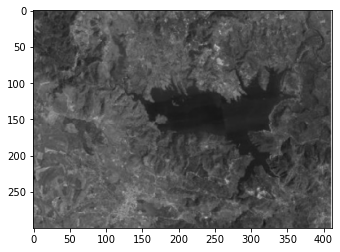

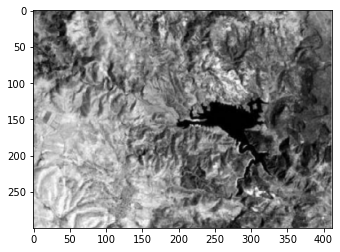

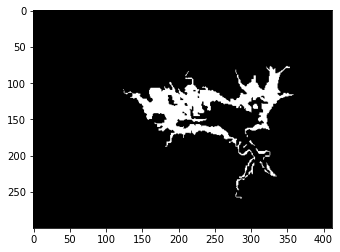

(412, 300)


In [3]:
path = 'D:\\FACULTATE\MASTER 1\\SEMESTRUL 2\\PCD\\imagini multisenzor\\'

im_A = Image.open(path +"Img1-A.ppm")
im_B = Image.open(path +"Img1-B.ppm")
im_C = Image.open(path +"Img1-C.ppm")

plt.imshow(im_A)
plt.show()
plt.imshow(im_B)
plt.show()
plt.imshow(im_C)
plt.show()

print(im_A.size)


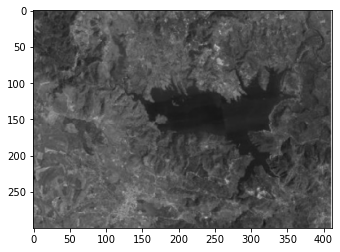

300
(300, 412, 3)


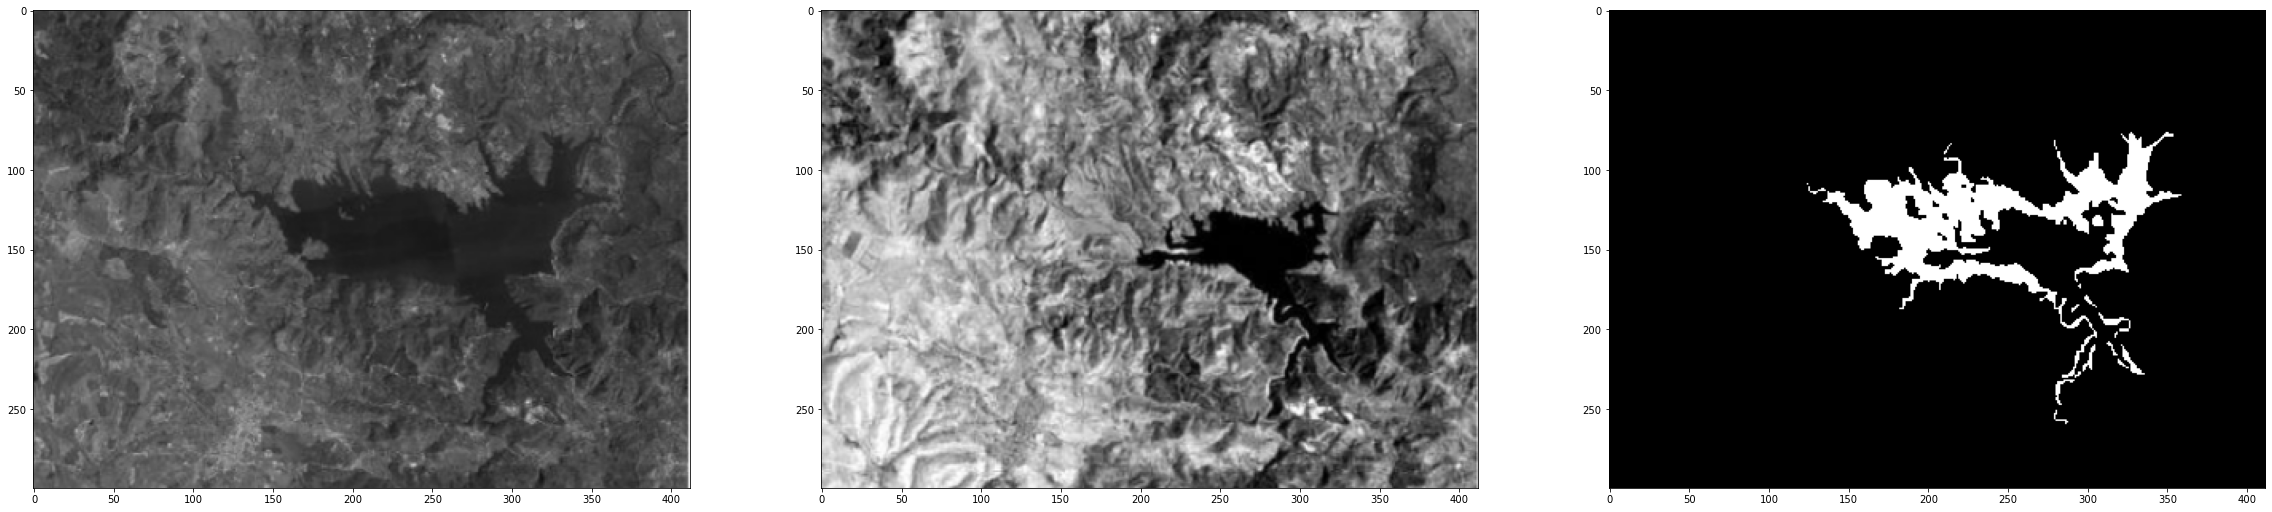

In [4]:
img1 = im_A
img2 = im_B
lbl = im_C

plt.imshow(img1)
plt.show()

img1 = np.asarray(img1)
img2 = np.asarray(img2)
lbl = np.asarray(lbl)
print(img1.shape[0])


print(lbl.shape)

plt.figure(figsize=(40,60))
plt.subplot(1,3,1)
plt.imshow(img1[:,:])
plt.subplot(1,3,2)
plt.imshow(img2[:,:])
plt.subplot(1,3,3)
plt.imshow(lbl[:,:])
plt.show()

In [5]:
IMAGE_SIZE = 112
IMAGE_NUMBER = (img1.shape[0]-IMAGE_SIZE-4)*(img1.shape[1]-IMAGE_SIZE-4)
VISUALIZE = 1

print(IMAGE_NUMBER)
lst = list(range(0,IMAGE_NUMBER,4))
#print(lst)
print(len(lst))

54464
13616


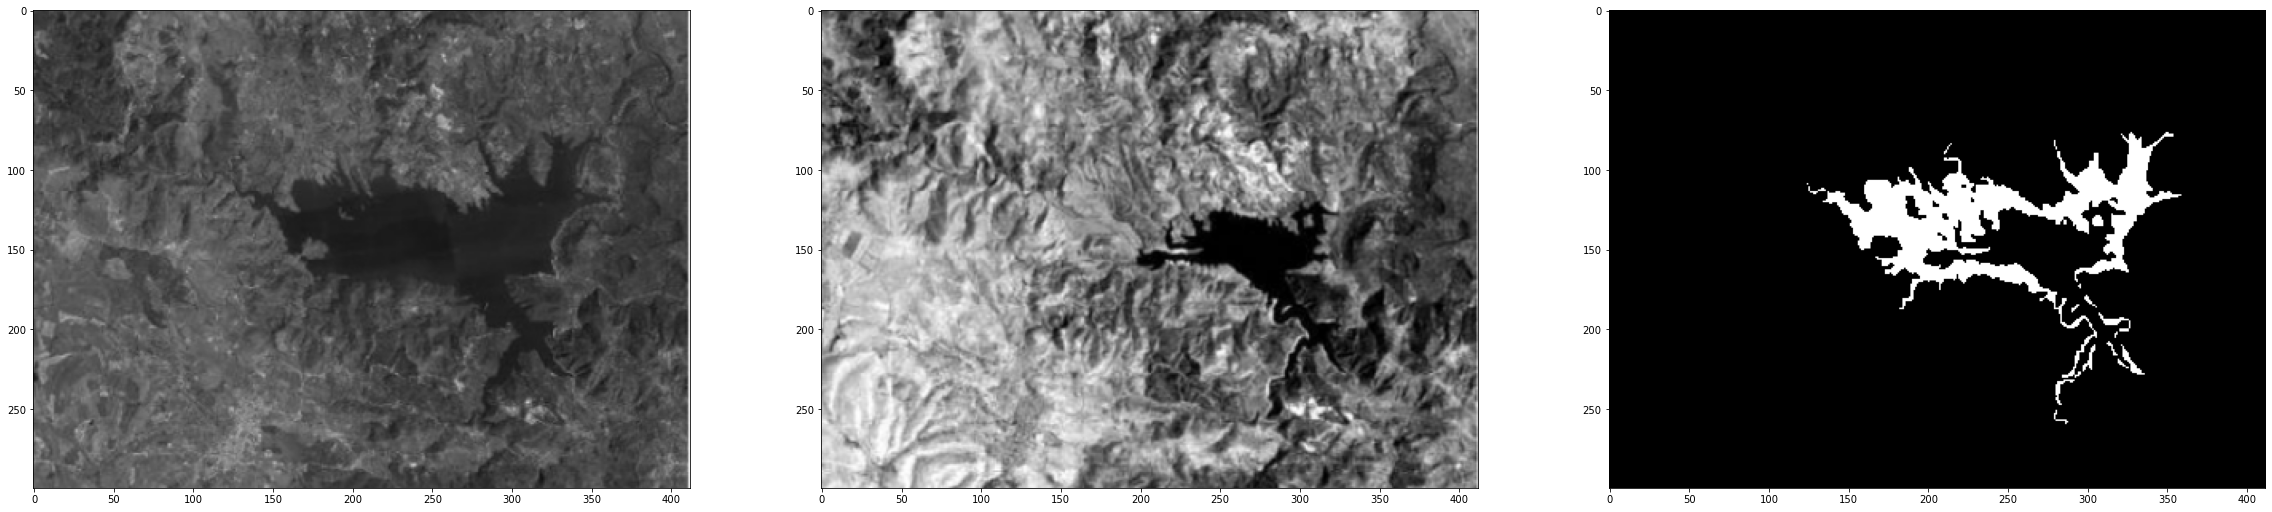

(300, 412, 3)
(300, 412, 3)
(300, 412, 3)
range(0, 54464, 2)


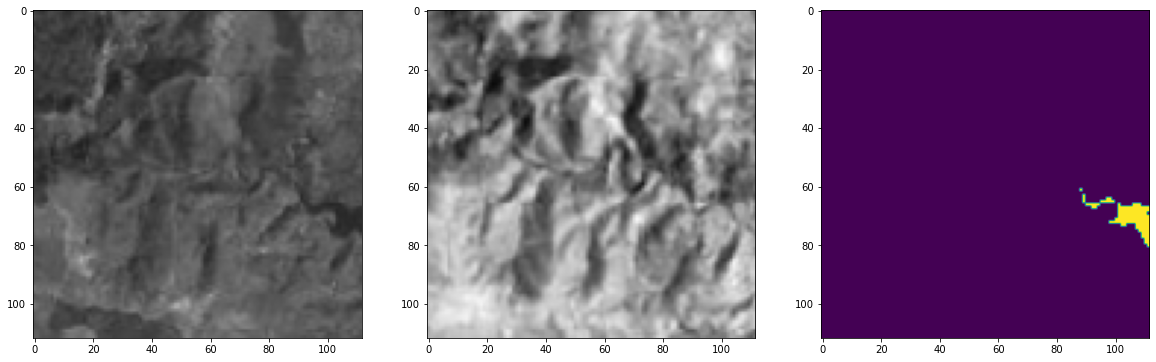

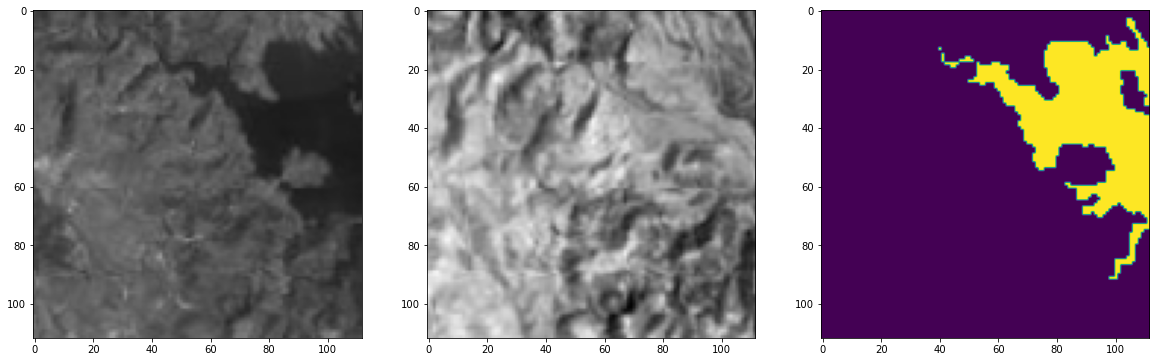

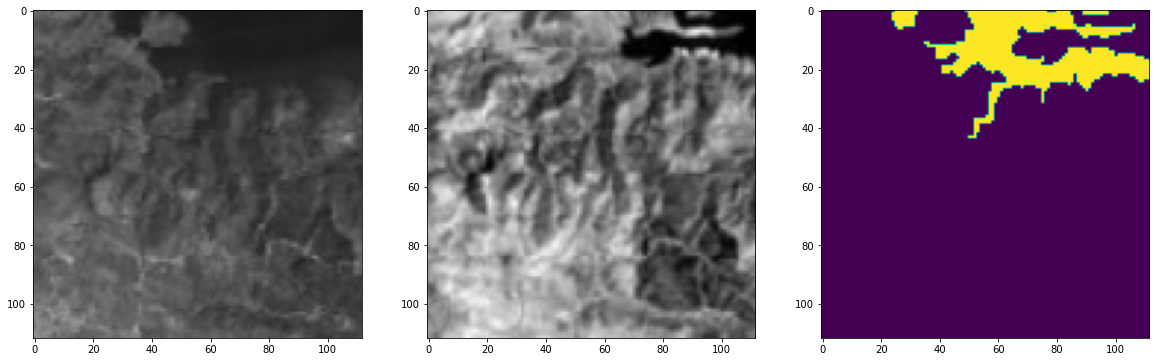

In [8]:

plt.figure(figsize=(40,60))
plt.subplot(1,3,1)
plt.imshow(img1[:,:])
plt.subplot(1,3,2)
plt.imshow(img2[:,:])
plt.subplot(1,3,3)
plt.imshow(lbl[:,:])
plt.show()

print(img1.shape)
print(img2.shape)
print(lbl.shape)

print(range(0,IMAGE_NUMBER,2))
i=0
for x in range(0,img1.shape[0]-IMAGE_SIZE-12,12):
    for y in range(0,img1.shape[1]-IMAGE_SIZE-12,12):
        i+=1
        #x = np.random.randint(img1.shape[0]-IMAGE_SIZE)
        #y = np.random.randint(img1.shape[1]-IMAGE_SIZE)
        mini_img1 = img1[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        mini_img2 = img2[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        mini_lbl = lbl[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        data = np.zeros([7,IMAGE_SIZE,IMAGE_SIZE])
        #print(data,"\n")
        data[:3,:,:] = mini_img1.transpose([2,0,1])
        data[3:6,:,:] = mini_img2.transpose([2,0,1])
        #print(mini_lbl)
        #print('\n')
        #print(data)
        #print(mini_lbl.shape)
        data[6,:,:] = mini_lbl[:,:,0]
        #file_nm = 'D:/FACULTATE/MASTER 1/SEMESTRUL 2/PCD/imagini multisenzor/train/' + "img" + str(x) + str(y).zfill(3) + '.npy'
        #np.save(file_nm, data)
        if VISUALIZE and i%100==0:
            plt.figure(figsize=(20,30))
            plt.subplot(1,3,1)
            plt.imshow(mini_img1)
            plt.subplot(1,3,2)
            plt.imshow(mini_img2)
            plt.subplot(1,3,3)
            plt.imshow(mini_lbl[:,:,0])
            plt.show()


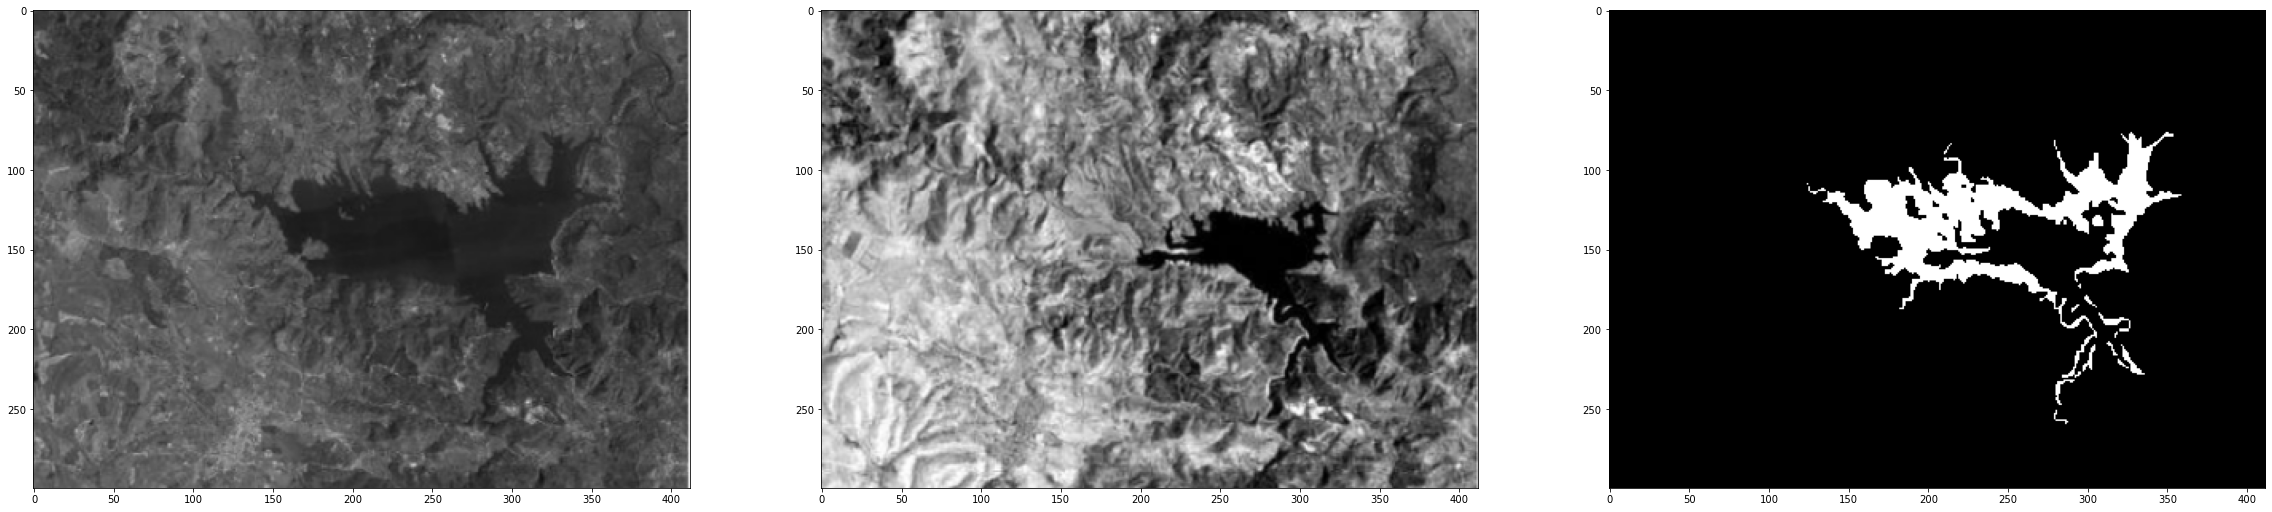

(300, 412, 3)
(300, 412, 3)
(300, 412, 3)


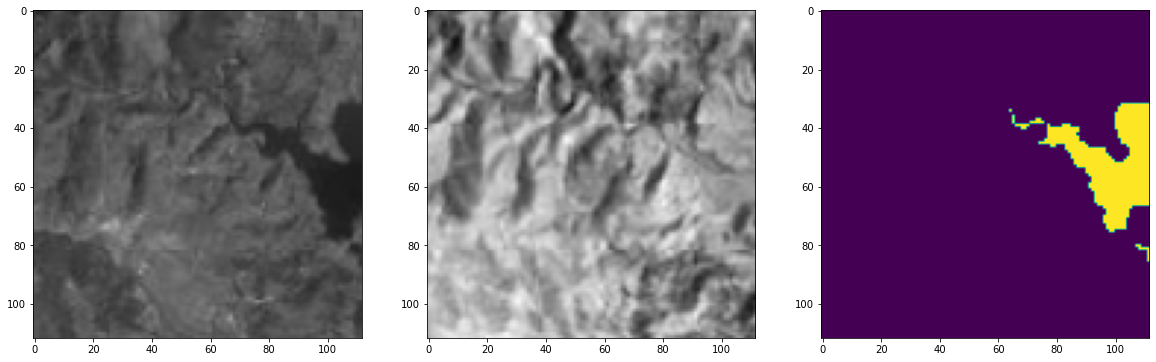

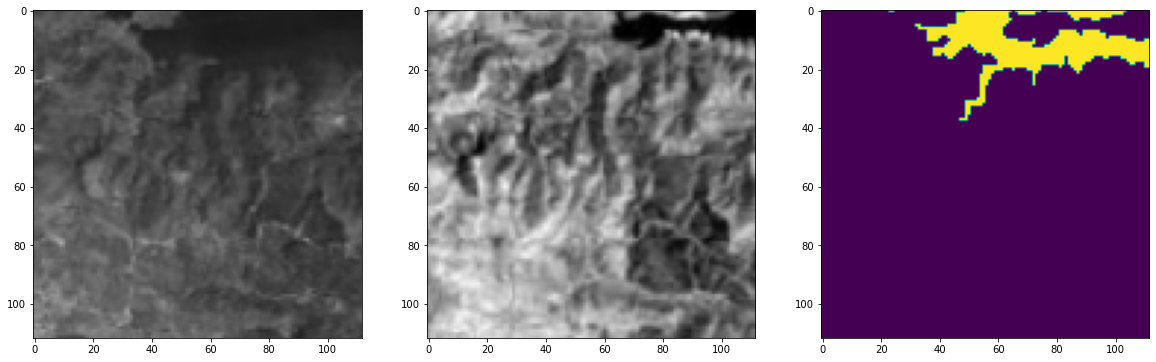

In [9]:
plt.figure(figsize=(40,60))
plt.subplot(1,3,1)
plt.imshow(img1[:,:])
plt.subplot(1,3,2)
plt.imshow(img2[:,:])
plt.subplot(1,3,3)
plt.imshow(lbl[:,:])
plt.show()

print(img1.shape)
print(img2.shape)
print(lbl.shape)

i=0
for x in range(0,img1.shape[0]-IMAGE_SIZE-15,15):
    for y in range(0,img1.shape[1]-IMAGE_SIZE-15,15):
        i+=1
        #x = np.random.randint(img1.shape[0]-IMAGE_SIZE)
        #y = np.random.randint(img1.shape[1]-IMAGE_SIZE)
        mini_img1 = img1[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        mini_img2 = img2[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        mini_lbl = lbl[x:x+IMAGE_SIZE,y:y+IMAGE_SIZE,:]
        data = np.zeros([7,IMAGE_SIZE,IMAGE_SIZE])
        #print(data,"\n")
        data[:3,:,:] = mini_img1.transpose([2,0,1])
        data[3:6,:,:] = mini_img2.transpose([2,0,1])
        #print(mini_lbl)
        #print('\n')
        #print(data)
        #print(mini_lbl.shape)
        data[6,:,:] = mini_lbl[:,:,0]
        #file_nm = 'D:/FACULTATE/MASTER 1/SEMESTRUL 2/PCD/imagini multisenzor/test/' + "img" + str(x) + str(y).zfill(3) + '.npy'
        #np.save(file_nm, data)
        if VISUALIZE and i%100==0:
            plt.figure(figsize=(20,30))
            plt.subplot(1,3,1)
            plt.imshow(mini_img1)
            plt.subplot(1,3,2)
            plt.imshow(mini_img2)
            plt.subplot(1,3,3)
            plt.imshow(mini_lbl[:,:,0])
            plt.show()

In [52]:

class convx2(nn.Module):
    def __init__(self, *ch):
        super(convx2, self).__init__()
        self.conv_number = len(ch)-1
        self.model = nn.Sequential()
        for i in range(self.conv_number):
            self.model.add_module('conv{0}'.format(i),nn.Conv2d(ch[i], ch[i+1], 3, 1, 1))

    def forward(self, x):
        y = self.model(x)
        return y
    
class FC_EF(nn.Module):
    def __init__(self, in_ch = 3):
        super(FC_EF, self).__init__()
        self.conv1 = convx2(*[in_ch*2, 16, 16])
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = convx2(*[16, 32, 32])
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = convx2(*[32, 64, 64, 64])
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = convx2(*[64, 128, 128, 128])
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.deconv1 = nn.ConvTranspose2d(128, 128, kernel_size=2, stride=2)
        self.conv5 = convx2(*[256, 128, 128, 64])
        self.deconv2 = nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2)
        self.conv6 = convx2(*[128, 64, 64, 32])
        self.deconv3 = nn.ConvTranspose2d(32, 32, kernel_size=2, stride=2)
        self.conv7 = convx2(*[64, 32, 16])
        self.deconv4 = nn.ConvTranspose2d(16, 16, kernel_size=2, stride=2)
        self.conv8 = convx2(*[32, 16, 2])

    def forward(self, x1, x2):
        h1 = self.conv1(torch.cat((x1,x2), 1))
        h = self.pool1(h1)
        h2 = self.conv2(h)
        h = self.pool2(h2)
        h3 = self.conv3(h)
        h = self.pool3(h3)
        h4 = self.conv4(h)
        h = self.pool4(h4)
        h = self.deconv1(h)
        h = self.conv5(torch.cat((h, h4), 1))
        h = self.deconv2(h)
        h = self.conv6(torch.cat((h, h3), 1))
        h = self.deconv3(h)
        h = self.conv7(torch.cat((h, h2), 1))
        h = self.deconv4(h)
        h = self.conv8(torch.cat((h, h1), 1))
        y = h
        return y

In [53]:
class OSCD(Dataset):
    def __init__(self, dir_nm):
        super(OSCD, self).__init__()
        self.dir_nm = dir_nm
        self.file_ls = os.listdir(dir_nm)
        self.file_size = len(self.file_ls)

    def __getitem__(self, idx):
        mat = np.load(self.dir_nm + self.file_ls[idx]).astype(np.float)
        x1 = mat[:3,:,:]/255
        x2 = mat[3:6,:,:]/255
        lbl = mat[6,:,:]/255
        return x1, x2, lbl

    def __len__(self):
        return self.file_size

In [54]:
train_dir = 'D:/FACULTATE/MASTER 1/SEMESTRUL 2/PCD/imagini multisenzor/train/'
test_dir = 'D:/FACULTATE/MASTER 1/SEMESTRUL 2/PCD/imagini multisenzor/test/'
lr = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data = OSCD(train_dir)
train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
test_data = OSCD(test_dir)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)
model = FC_EF().to(device, dtype=torch.float)

optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    loss_v = []
    model.train()
    for i, data in enumerate(train_dataloader):
        x1, x2, lbl = data
        x1 = x1.to(device, dtype=torch.float)
        x2 = x2.to(device, dtype=torch.float)
        lbl = lbl.to(device, dtype=torch.long)
        y = model(x1,x2)
        
        #print("Compose images: ")
        #print(y)
        #print("\n\nGround Truth: ")
        #print(lbl)
        optimizer.zero_grad()
        loss = criterion(y, lbl)
        loss.backward()
        optimizer.step()
        loss_v.append(loss.item())
        if(i%20==0 and i>0):
            print(np.mean(loss_v))
            loss_v = []

    loss_v = []
    model.eval()
    for i, data in enumerate(test_dataloader):
        x1, x2, lbl = data
        x1 = x1.to(device, dtype=torch.float)
        x2 = x2.to(device, dtype=torch.float)
        lbl = lbl.to(device, dtype=torch.long)
        y = model(x1, x2)
        optimizer.zero_grad()
        loss = criterion(y, lbl)
        loss.backward()
        optimizer.step()
        loss_v.append(loss.item())
    print('test:', np.mean(loss_v))
    loss_v = []

C:\Users\Marina\anaconda3\envs\IC2\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


0.6050228022393727
test: 0.3520689711889677
0.2632386847620919
test: 0.14295988208859375
0.12324281249727521
test: 0.11637187572277821
0.11092470728215717
test: 0.11095296037628462
0.10756678666387286
test: 0.10941691931925322
0.11226267225685574
test: 0.10913940629382667
0.11048667026417595
test: 0.10716041809013277
0.10467825404235295
test: 0.1068531806262112
0.10288248690111297
test: 0.10484739787990979
0.10104726716166451
test: 0.10407504266160622
